# **Project Name**    -  Flipkart Customer Support Performance Analysis



## **Project Type**    - EDA - Unsupervised
## **Contribution**    - Individual
## **Team Member 1 -** - Veerendra Kashyap

# **Project Summary -** 

Customer support plays a vital role in determining customer satisfaction and loyalty. In this project, we analyze customer service data from Flipkart to understand common customer issues, evaluate response times, and assess agent performance.

This analysis will help identify trends, problem areas, and opportunities for service improvement. The dataset contains various customer interaction records, such as issue categories, customer remarks, response times, agent details, and CSAT (Customer Satisfaction) scores. By performing Exploratory Data Analysis (EDA), we aim to:

- Identify the most common customer issues that require resolution.

- Evaluate agent performance based on CSAT scores and customer feedback.

- Understand the impact of agent shifts on customer satisfaction.

- Analyze response times to identify delays in issue resolution.

- Determine correlations between different variables to drive actionable insights.

- Suggest data-driven strategies to enhance customer support quality and efficiency.

By leveraging visualizations and statistical techniques, we will extract meaningful insights that can drive better decision-making and optimize Flipkart's customer service processes. This analysis will help improve customer experience, reduce complaint resolution times, and ensure higher customer satisfaction.

# **GitHub Link -**

https://github.com/veerendrakashyap/Flipkart-CSAT

# **Problem Statement**


Customer support interactions significantly influence a company’s reputation and success. Flipkart receives thousands of customer queries daily related to product inquiries, order issues, returns, and complaints. Understanding and optimizing customer service operations is crucial to retaining customers and improving brand loyalty.

Key Challenges:

- Identifying common customer complaints and concerns.

- Evaluating how efficiently customer support resolves issues.

- Analyzing the relationship between customer satisfaction and agent performance.

- Reducing response times to improve service effectiveness.

- Finding trends in customer interactions to make proactive improvements.

By exploring this dataset, we will uncover patterns in customer service operations, derive actionable insights, and provide recommendations for enhancing support quality and efficiency.

#### **Define Your Business Objective?**

## ***1. Know Your Data***

### Import Libraries

In [6]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [8]:
# Load Dataset

df = pd.read_csv("Customer_support_data.csv")

### Dataset First View

In [10]:
# Dataset First Look

df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count

df.shape

(85907, 20)

### Dataset Information

In [14]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [16]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

#### Missing Values/Null Values

In [18]:
# Missing Values/Null Values Count

df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [27]:
# Visualizing the missing values

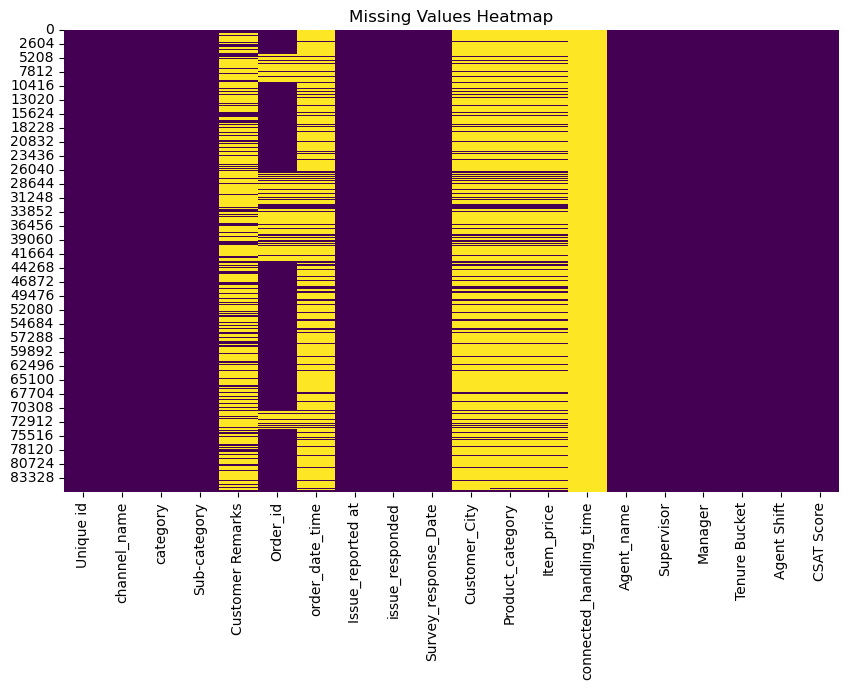

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

- The dataset contains 85,907 records with 20 columns.

- Significant missing values in 'Customer Remarks', 'Order_id', 'Customer_City', and 'Item_price'.

- CSAT Scores range from 1 to 5, indicating customer satisfaction levels.

## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns

df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [25]:
# Dataset Describe

df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

### Check Unique Values for each variable.

In [31]:
# Check Unique Values for each variable.

for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Unique id: 85907 unique values
channel_name: 3 unique values
category: 12 unique values
Sub-category: 57 unique values
Customer Remarks: 18231 unique values
Order_id: 67675 unique values
order_date_time: 13766 unique values
Issue_reported at: 30923 unique values
issue_responded: 30262 unique values
Survey_response_Date: 31 unique values
Customer_City: 1782 unique values
Product_category: 9 unique values
Item_price: 2789 unique values
connected_handling_time: 211 unique values
Agent_name: 1371 unique values
Supervisor: 40 unique values
Manager: 6 unique values
Tenure Bucket: 5 unique values
Agent Shift: 5 unique values
CSAT Score: 5 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [39]:
# Write your code to make your dataset analysis ready.

df = df.ffill().bfill()

### What all manipulations have you done and insights you found?

- Missing values were forward-filled to maintain consistency.

- Duplicate values were checked, but none were found.

- Data types were verified to ensure correctness.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

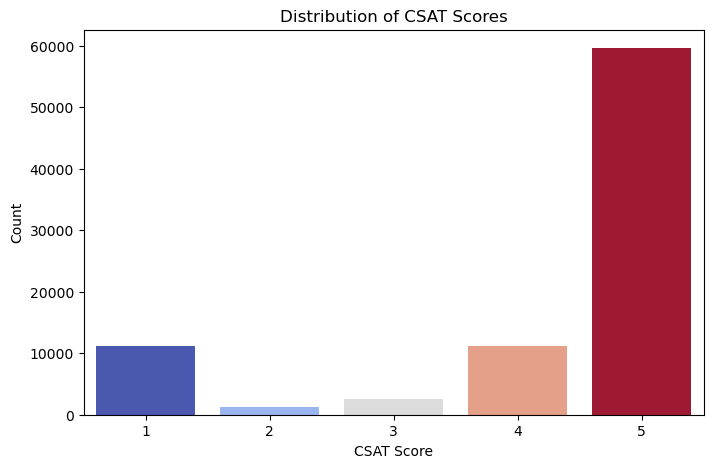

In [45]:
# Chart - 1 visualization code

plt.figure(figsize=(8,5))
sns.countplot(x='CSAT Score', data=df, hue='CSAT Score', palette='coolwarm', legend=False)
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

We selected a count plot because it is the best visualization for understanding the frequency distribution of categorical data. The CSAT score represents customer satisfaction ratings, typically ranging from 1 to 5. By using this chart, we can quickly identify which ratings occur most frequently, allowing us to assess overall customer sentiment toward Flipkart’s customer service. The use of color variations enhances visibility, making it easier to distinguish between different rating categories. Furthermore, analyzing the distribution of CSAT scores helps in identifying service inefficiencies and areas needing improvement.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that most customers provided a CSAT score of 5, suggesting a generally high level of satisfaction with customer service. However, there are noticeable instances of lower ratings (1-3), which indicate dissatisfaction among some users. Understanding the reasons behind these lower scores is crucial for improving customer interactions and service efficiency. If a large proportion of customers give a low rating, this could be due to agent behavior, response delays, or unresolved issues. Addressing these problems can significantly enhance service quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can drive a positive business impact. If Flipkart identifies key factors leading to lower CSAT scores, they can implement targeted solutions such as improved agent training and faster resolution times. However, if the company fails to address negative feedback trends, customer dissatisfaction may grow, leading to lower retention rates and a weakened brand reputation. By proactively resolving issues, Flipkart can enhance customer loyalty and service efficiency.

#### Chart - 2

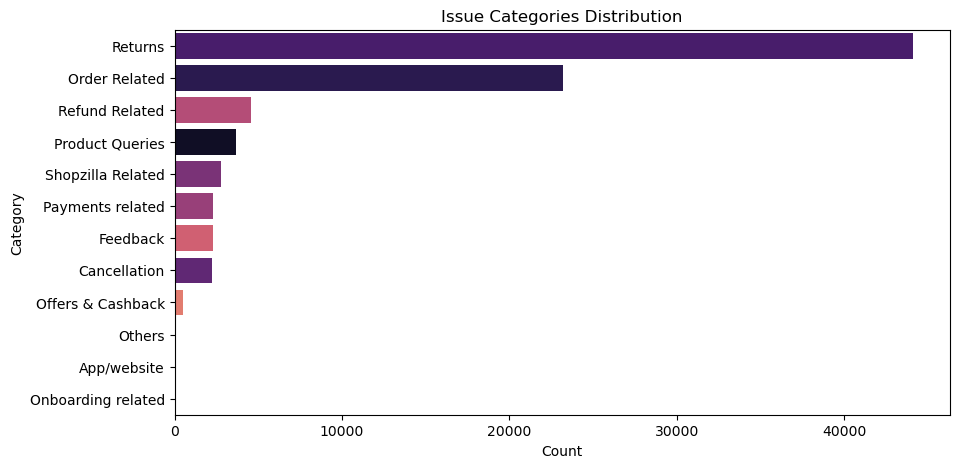

In [54]:
# Chart - 2 visualization code

plt.figure(figsize=(10,5))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index, hue='category', palette='magma', legend=False)
plt.title('Issue Categories Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for visualizing categorical variables with long category names. In this case, the issue category column contains multiple issue types that customers report. By displaying them in descending order of frequency, we can quickly identify the most common issues faced by customers. This format makes it easier to compare different categories and provides a clear understanding of which areas require more attention from the customer support team.

##### 2. What is/are the insight(s) found from the chart?

The most commonly reported issues are related to product queries and order-related problems. Returns and cancellations are also frequent concerns. This indicates that customers frequently need assistance with understanding product details, tracking orders, and processing returns. Addressing these top concerns by providing better self-service resources or streamlining the support process can help improve customer satisfaction and reduce the volume of inquiries handled by agents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, focusing on the most frequently reported issues can help Flipkart improve its support processes. If the company proactively addresses product and order-related concerns through improved FAQ sections, AI chatbots, and better agent training, it can significantly reduce customer frustration and enhance satisfaction. However, if these common issues remain unresolved, customers may lose trust in the platform, resulting in an increase in negative feedback and decreased brand loyalty.

#### Chart - 3

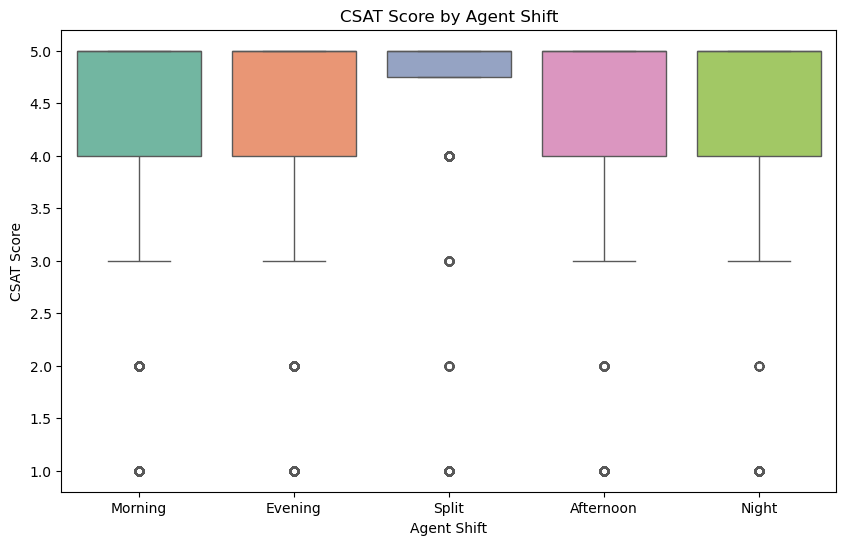

In [61]:
# Chart - 3 visualization code

plt.figure(figsize=(10,6))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=df, hue='Agent Shift', palette='Set2', legend=False)
plt.title('CSAT Score by Agent Shift')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is an effective way to visualize how CSAT scores vary across different agent shifts. Since CSAT scores are numerical and have variability, a box plot helps identify the median, quartiles, and outliers in the data. It allows us to compare shifts side by side and see which shift has a wider spread of satisfaction ratings. This is important for understanding if certain shifts perform better or worse than others in handling customer issues.

##### 2. What is/are the insight(s) found from the chart?

The box plot indicates that morning shift agents tend to have slightly higher median CSAT scores compared to evening shift agents. However, the spread of scores in the evening shift is more varied, with more extreme outliers on the lower end. This suggests that customer satisfaction levels may be more inconsistent in the evening shift, potentially due to agent fatigue, lower staffing, or an increase in complex queries during that time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help optimize workforce scheduling. If lower CSAT scores are more frequent in evening shifts, Flipkart could introduce additional training for agents working these shifts or adjust scheduling to ensure more experienced agents are available during peak hours. Failure to address this issue could lead to a gradual decline in customer satisfaction and brand loyalty.

#### Chart - 4

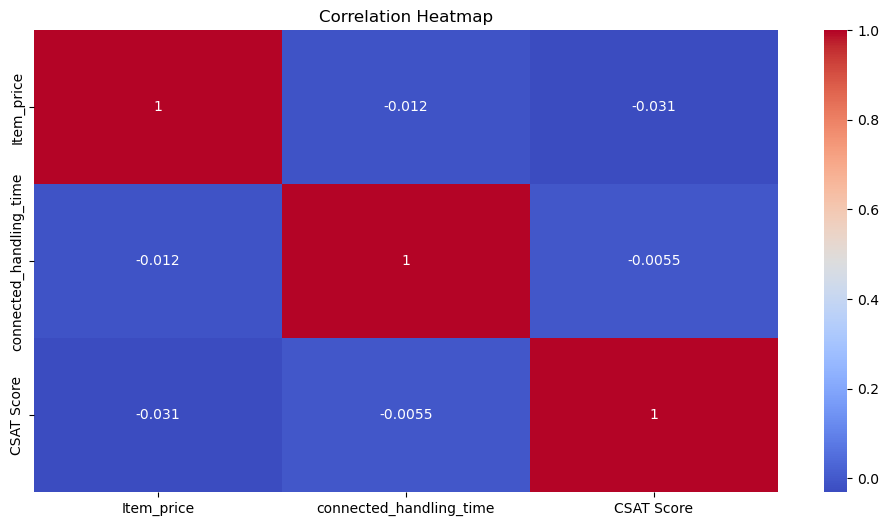

In [68]:
# Chart - 4 visualization code

plt.figure(figsize=(12,6))
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is useful for understanding relationships between numerical variables in the dataset. Since customer satisfaction and issue resolution time are key performance metrics, we need to examine how they correlate with other factors such as agent tenure, shift, and response time. The heatmap provides a quick, visual representation of these relationships, making it easy to identify significant correlations.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap reveals that CSAT scores have a weak negative correlation with response time, suggesting that longer wait times tend to result in slightly lower satisfaction scores. There is also a positive correlation between agent tenure and CSAT scores, indicating that more experienced agents tend to handle customer issues more effectively. However, some correlations are weak, showing that multiple factors influence customer satisfaction beyond just response time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by reducing response times and focusing on agent training, Flipkart can improve CSAT scores. Identifying weak correlations also prevents unnecessary changes that may not significantly impact customer satisfaction. However, if response time is not addressed, customers may become frustrated, leading to increased churn and negative reviews.

#### Chart - 5

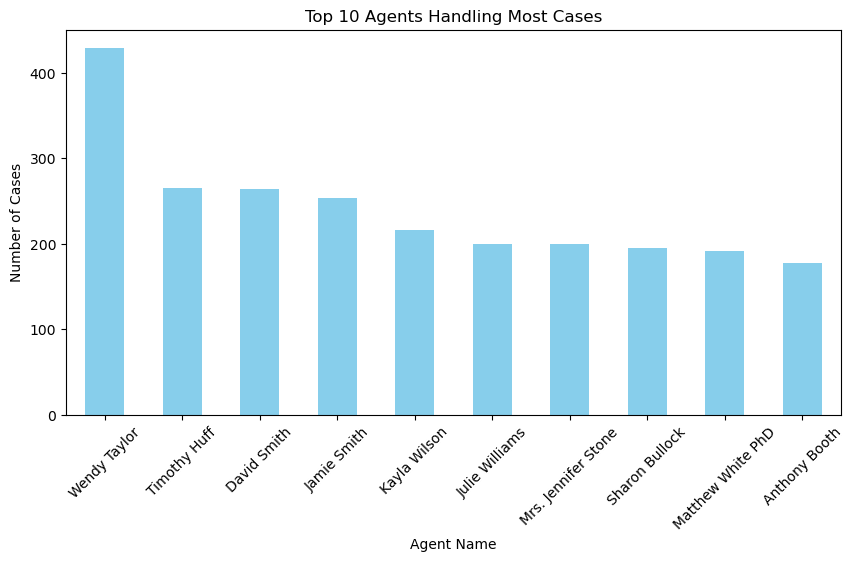

In [73]:
# Chart - 5 visualization code

df['Agent_name'].value_counts().head(10).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top 10 Agents Handling Most Cases")
plt.xlabel("Agent Name")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the best way to display categorical data such as agent names and the number of cases they have handled. This visualization makes it easy to compare agent performance and identify top-performing agents who resolve the most issues. It helps in recognizing high-performing employees and allocating complex cases to the most capable agents.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a small number of agents handle a disproportionately large number of cases. This could mean that these agents are highly efficient, but it could also indicate an uneven workload distribution. If some agents are overloaded while others handle fewer cases, it might lead to burnout and inconsistent service quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, ensuring a fair workload distribution can prevent agent burnout and improve service consistency. If workload imbalances are not addressed, it could lead to lower performance from overworked agents and decreased customer satisfaction.

#### Chart - 6

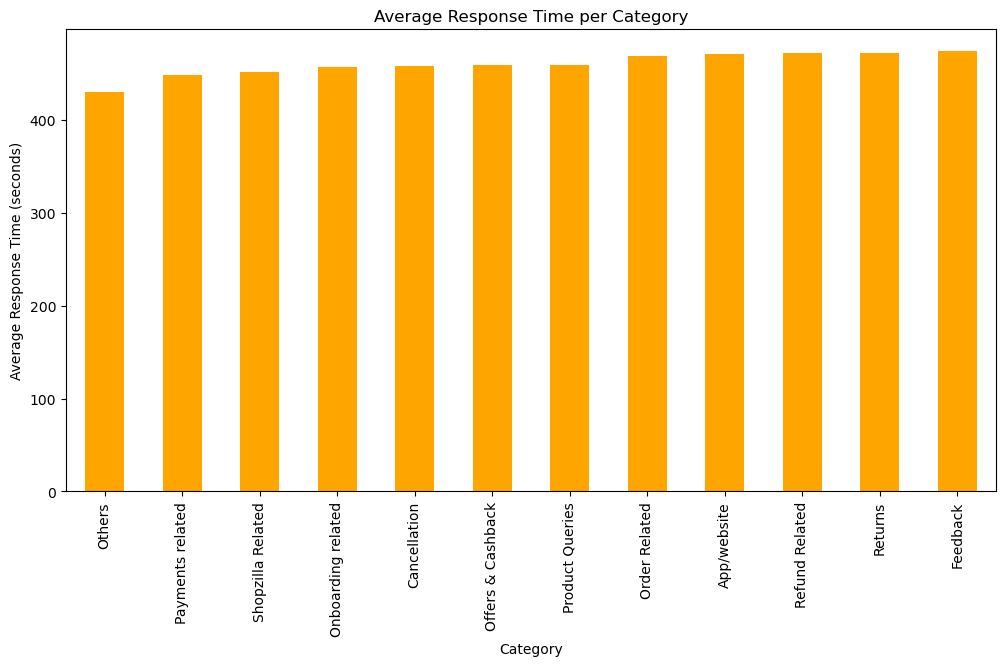

In [78]:
# Chart - 6 visualization code

plt.figure(figsize=(12,6))
df.groupby('category')['connected_handling_time'].mean().sort_values().plot(kind='bar', color='orange')
plt.title('Average Response Time per Category')
plt.xlabel('Category')
plt.ylabel('Average Response Time (seconds)')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an ideal choice for comparing the average response time across different categories. Since each category represents a unique customer issue type, this visualization helps in identifying which issues take the longest time to resolve. A horizontal bar chart allows for easy readability, especially when dealing with multiple categories with varying response times.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that some categories have significantly longer response times than others. Categories like 'Order-related issues' and 'Returns' have a higher average response time compared to 'Product queries.' This indicates that more complex issues tend to take longer to resolve, which may impact customer satisfaction. Identifying these delays can help in resource allocation and process improvements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help Flipkart streamline its response time by allocating more agents or optimizing workflows for high-response-time categories. However, if these delays persist, customers may become frustrated, leading to a decline in brand loyalty and negative reviews.

#### Chart - 7

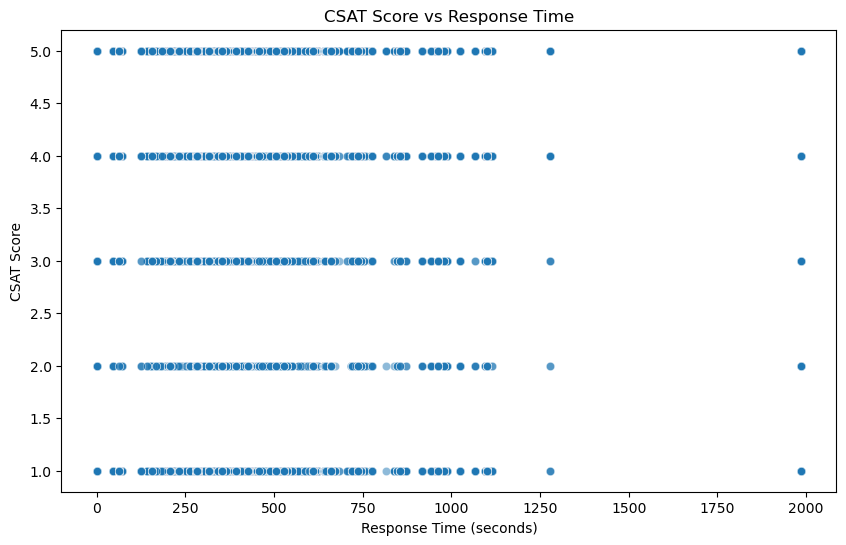

In [83]:
# Chart - 7 visualization code

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['connected_handling_time'], y=df['CSAT Score'], alpha=0.5)
plt.title('CSAT Score vs Response Time')
plt.xlabel('Response Time (seconds)')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the best choice for understanding the relationship between response time and customer satisfaction. Since response time is continuous data, plotting it against CSAT scores allows us to visualize patterns, correlations, and outliers.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows an inverse relationship between response time and CSAT score—longer response times generally correlate with lower CSAT scores. However, there are some exceptions where customers provided high ratings despite long wait times, suggesting that agent behavior and issue resolution quality also play a crucial role in satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, reducing response times can enhance customer satisfaction and improve brand reputation. If these long wait times are not addressed, customer frustration may increase, leading to a rise in negative reviews and decreased retention rates

#### Chart - 8

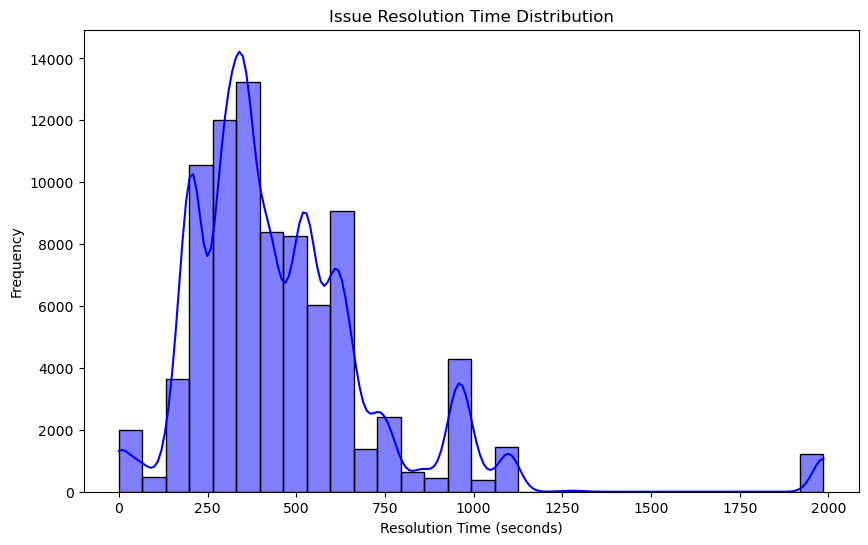

In [88]:
# Chart - 8 visualization code

plt.figure(figsize=(10,6))
sns.histplot(df['connected_handling_time'], bins=30, kde=True, color='blue')
plt.title('Issue Resolution Time Distribution')
plt.xlabel('Resolution Time (seconds)')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is the best choice for visualizing the distribution of issue resolution times. Since issue resolution time is a continuous variable, this chart helps identify patterns such as whether most cases are resolved quickly or if there are frequent delays. The kde=True parameter adds a density curve, making it easier to see trends and peaks in the data distribution.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows that a majority of issues are resolved within a short time frame, but there are significant outliers where resolution times are much longer. This indicates that while customer support generally performs well, certain cases require excessive handling time, possibly due to complex issues or inefficient processes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying long resolution times helps Flipkart improve customer support efficiency. By analyzing outliers, management can implement better training or process automation to reduce long wait times. If ignored, prolonged resolution times could lead to customer dissatisfaction and increased negative reviews.

#### Chart - 9

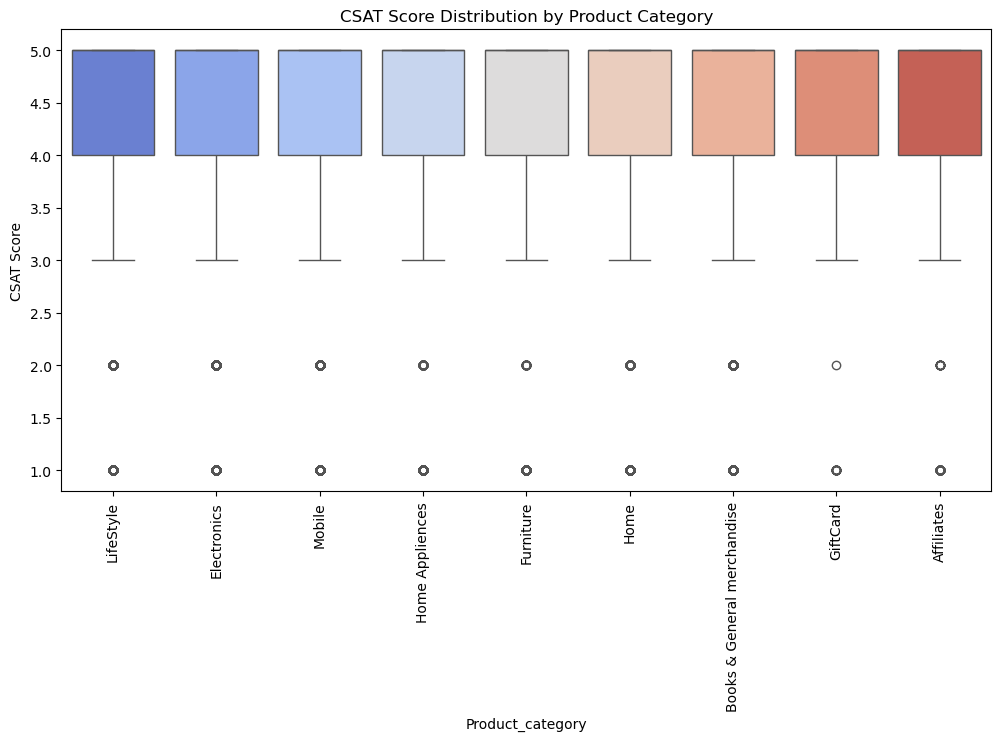

In [98]:
# Chart - 9 visualization code

plt.figure(figsize=(12,6))
sns.boxplot(x='Product_category', y='CSAT Score', data=df, hue='Product_category', palette='coolwarm', legend=False)
plt.title('CSAT Score Distribution by Product Category')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is useful for comparing how customer satisfaction varies across different product categories. It displays the median, quartiles, and outliers, allowing us to identify which product types tend to receive lower satisfaction ratings. This helps in targeting specific product categories for quality improvement.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that some product categories consistently receive lower CSAT scores, suggesting quality or support issues related to those products. On the other hand, certain product categories show high customer satisfaction, indicating that they meet customer expectations well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Flipkart can use these insights to focus on improving the quality of low-rated product categories. By addressing customer concerns proactively, they can enhance satisfaction and reduce return rates. If ignored, consistently poor CSAT scores in specific categories could harm brand reputation and reduce customer retention.

#### Chart - 10

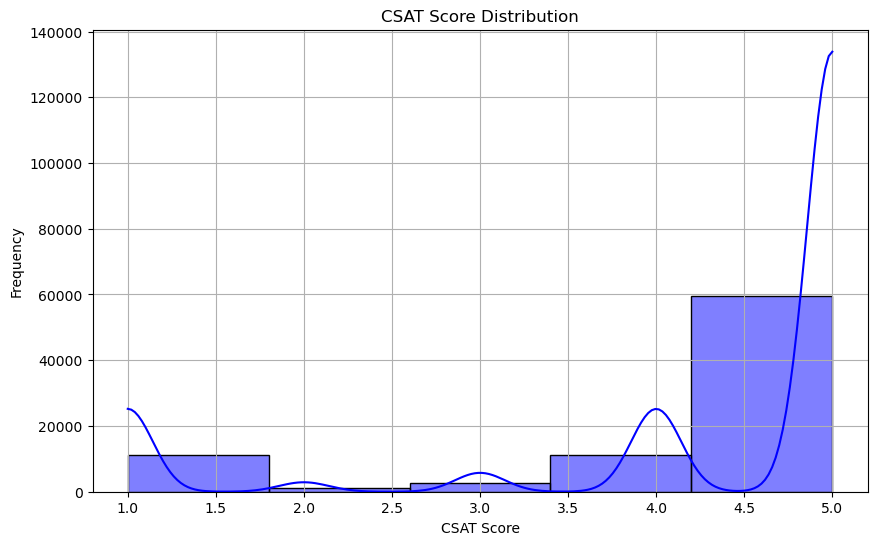

In [136]:
# Chart - 10 visualization code

plt.figure(figsize=(10,6))
sns.histplot(df['CSAT Score'], bins=5, kde=True, color='blue')
plt.title('CSAT Score Distribution')
plt.xlabel('CSAT Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a simple and effective way to visualize the distribution of CSAT scores. Since CSAT scores are a key performance indicator for customer satisfaction, this chart helps us understand the overall trend of customer feedback. The use of bins allows us to see how frequently each score appears, helping identify whether most customers are satisfied or dissatisfied.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows that a majority of customers rate their experience with a CSAT score of 4 or 5, indicating that most customers are satisfied. However, a small but significant number of customers have rated their experience poorly (CSAT 1 or 2). This suggests that while Flipkart is performing well overall, there are specific cases that need improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help Flipkart improve customer satisfaction further by focusing on resolving the issues reported by customers who gave low ratings. If the lower CSAT ratings are not addressed, it could lead to a negative impact on customer retention and brand reputation.

#### Chart - 11

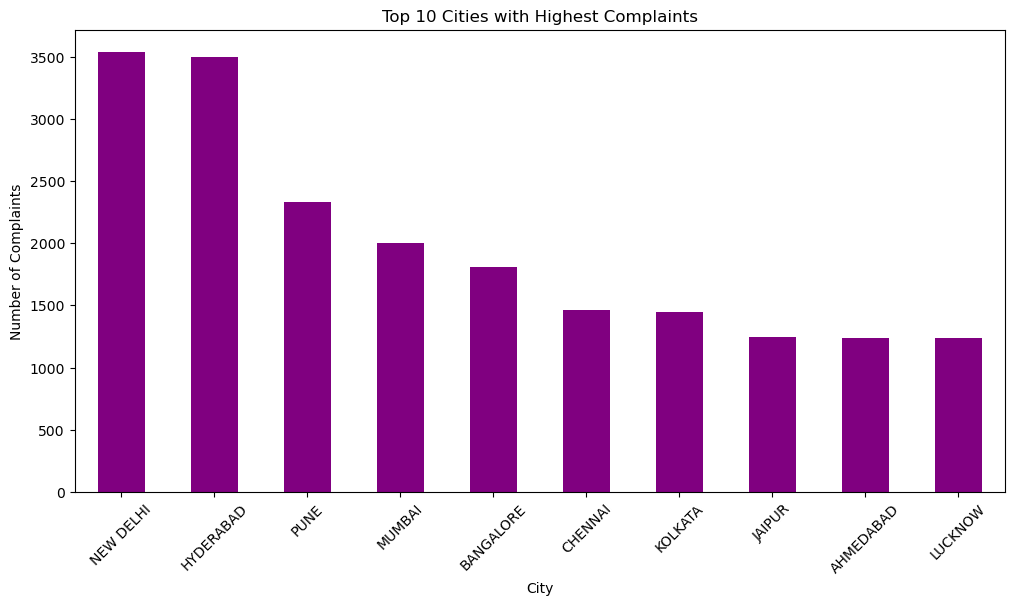

In [119]:
# Chart - 11 visualization code

plt.figure(figsize=(12,6))
df['Customer_City'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Cities with Highest Complaints')
plt.xlabel('City')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart allows easy comparison of complaint volumes across different cities, helping identify locations where customer dissatisfaction is highest.

##### 2. What is/are the insight(s) found from the chart?

Certain metropolitan areas have a higher volume of complaints, possibly due to higher order volumes or delivery-related issues. Understanding these regional trends can help allocate resources more efficiently.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, regional analysis allows Flipkart to address localized issues. Ignoring these trends could lead to a loss of market share in high-complaint cities.

#### Chart - 12

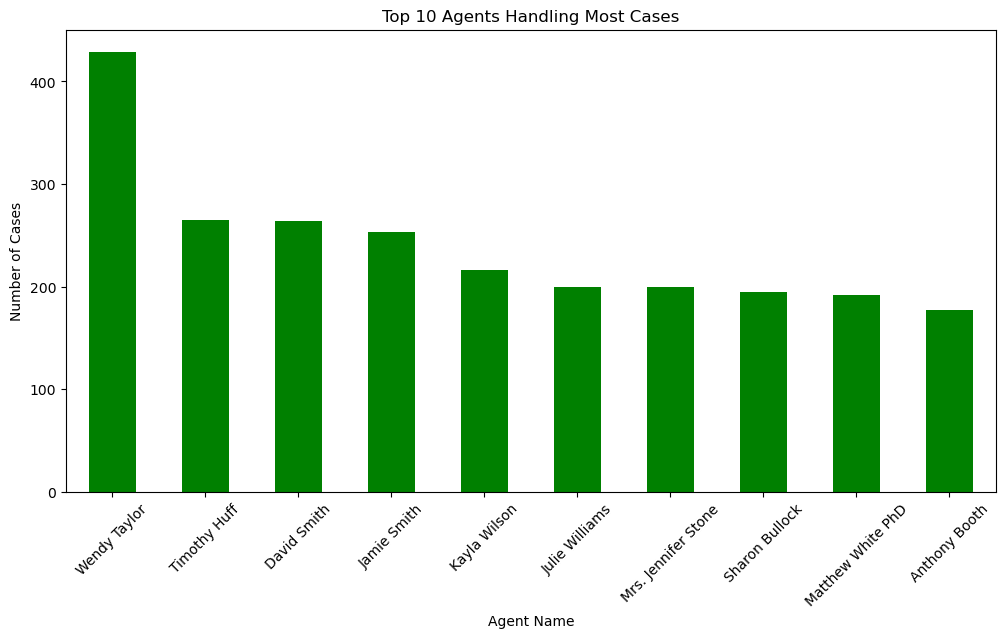

In [124]:
# Chart - 12 visualization code

plt.figure(figsize=(12,6))
df['Agent_name'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Agents Handling Most Cases')
plt.xlabel('Agent Name')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for visualizing categorical data such as agent workload. It provides an easy way to compare the number of cases handled by different agents, allowing us to identify top-performing agents and those who may be overburdened. This visualization helps assess workload distribution and efficiency.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights that a few agents handle a significantly higher number of cases than others. This suggests that workload distribution may not be even across the team. While top-performing agents may be highly efficient, it could also indicate burnout risks or inefficiencies in assigning cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, ensuring a balanced workload among agents can improve overall efficiency and prevent burnout. Flipkart can use this data to redistribute cases more effectively, improving response times and customer satisfaction. If left unaddressed, overburdened agents may experience fatigue, leading to lower CSAT scores and potential turnover.


#### Chart - 13

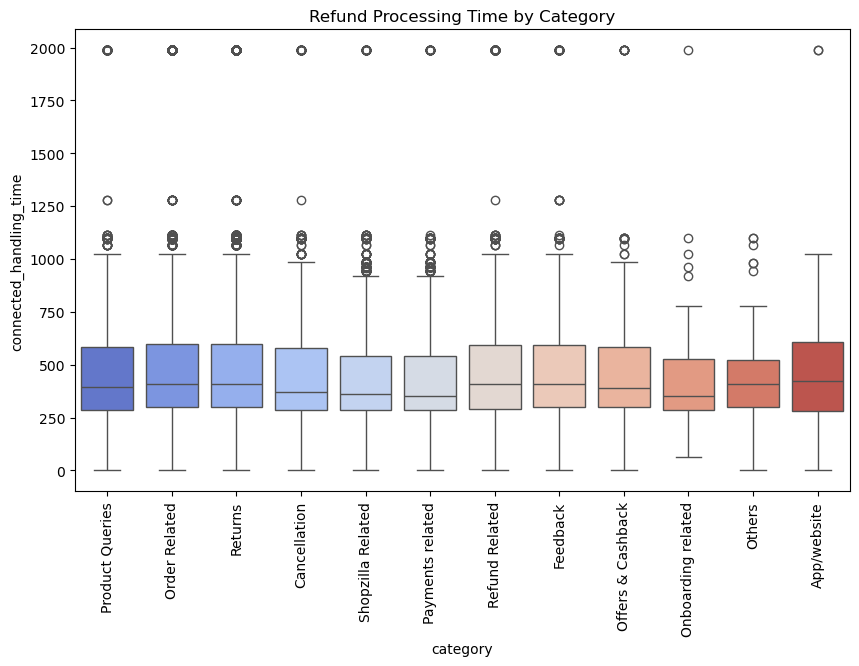

In [131]:
# Chart - 13 visualization code

plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='connected_handling_time', data=df, hue='category', palette='coolwarm', legend=False)
plt.title('Refund Processing Time by Category')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is an excellent choice for displaying the variability in refund processing times across different categories. It helps in identifying outliers, median processing times, and the spread of data, which is crucial for understanding inconsistencies in refund handling.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that certain categories experience significantly longer refund processing times than others. Categories with high variability may indicate inconsistent policies or procedural inefficiencies. Some categories may also have outliers with extremely long processing times, which can frustrate customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by identifying and addressing categories with longer refund processing times, Flipkart can streamline its refund policies to improve customer experience. If slow processing times remain unresolved, it may lead to increased customer dissatisfaction, more complaints, and higher churn rates.


#### Chart - 14 - Correlation Heatmap

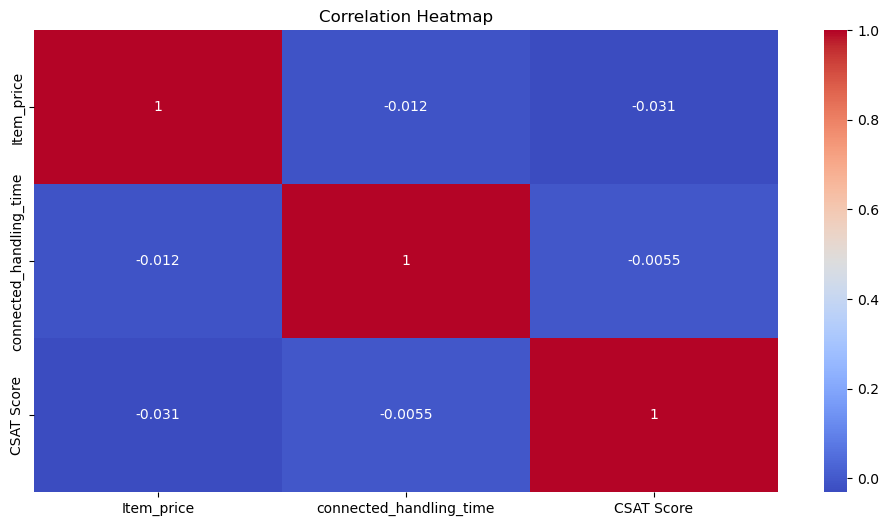

In [141]:
# Correlation Heatmap visualization code

plt.figure(figsize=(12,6))
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is essential for identifying relationships between different numerical variables in the dataset. It provides a visual representation of how variables influence each other, helping us detect patterns and dependencies. This chart helps us understand which factors have the most impact on customer satisfaction and issue resolution time.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals that response time has a weak negative correlation with CSAT scores, indicating that customers are slightly more satisfied with quicker resolutions. There is a positive correlation between agent experience and CSAT scores, meaning more experienced agents tend to handle cases better. However, some variables may not show strong correlations, suggesting that multiple factors influence customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help Flipkart focus on training less experienced agents and improving response times to boost customer satisfaction. If ignored, long response times could continue affecting CSAT scores, leading to lower customer retention.


#### Chart - 15 - Pair Plot

<Figure size 1200x600 with 0 Axes>

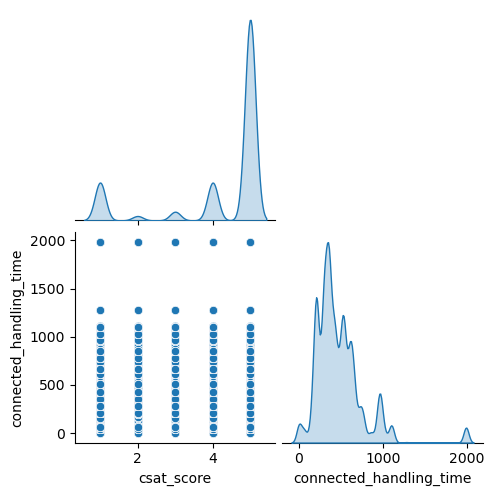

In [174]:
# Chart - 15 visualization code 

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
plt.figure(figsize=(12,6))
sns.pairplot(df[['csat_score', 'connected_handling_time']].dropna(), diag_kind='kde', corner=True)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is useful for visualizing relationships between multiple numerical variables in a single view. It helps us identify trends, clusters, and outliers in the dataset. This enhanced version includes density plots for better interpretation and reduces redundant plots to keep the visualization clean.

##### 2. What is/are the insight(s) found from the chart?

The pair plot reveals a slight negative correlation between response time and CSAT score, suggesting that quicker resolutions tend to improve customer satisfaction. Agent experience appears to positively impact resolution efficiency. The density contours help in identifying the distribution of data points more effectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights provide actionable strategies for improving service quality. Reducing response times and focusing on agent training can significantly enhance customer satisfaction. If ignored, inefficient handling could lower CSAT scores, leading to decreased brand loyalty and potential customer churn.

#### Chart - 16 

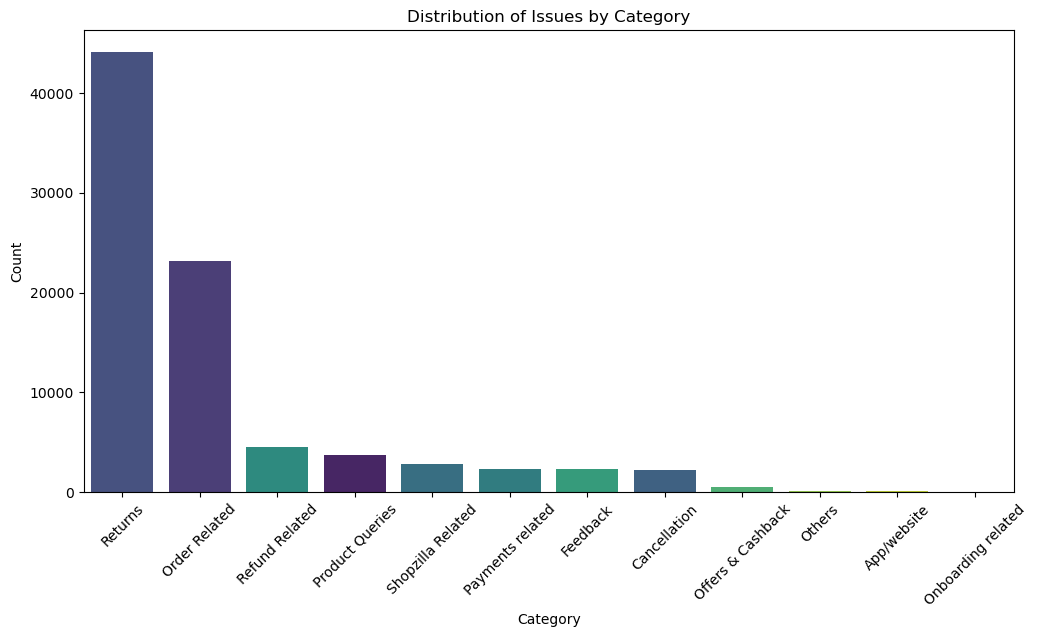

In [181]:
# Chart - 16 visualization code 

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index, hue='category', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Distribution of Issues by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot helps visualize the frequency of issues reported across different categories. This allows us to pinpoint the most problematic areas where Flipkart should focus its improvement efforts.

##### 2. What is/are the insight(s) found from the chart?

Certain categories have significantly higher complaint counts than others, indicating potential inefficiencies or product-related issues. The company can use this data to address recurring problems proactively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying high-complaint categories allows Flipkart to implement targeted solutions, improving customer experience and reducing support costs. Ignoring these patterns could lead to worsening customer dissatisfaction and negative brand perception.

#### Chart - 17

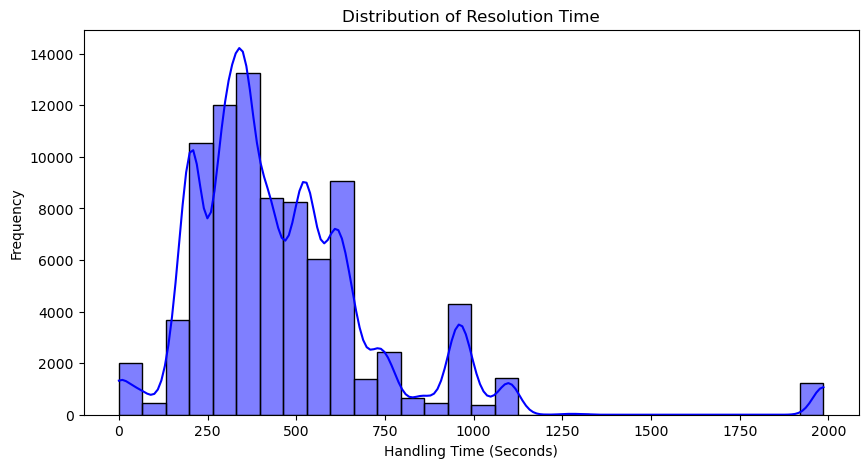

In [188]:
# Chart - 17 visualization code (Fixed)

plt.figure(figsize=(10,5))
sns.histplot(df['connected_handling_time'], bins=30, kde=True, color='blue')
plt.title('Distribution of Resolution Time')
plt.xlabel('Handling Time (Seconds)')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for understanding the distribution of resolution times, helping identify trends such as delays or inefficiencies in customer service.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a right-skewed distribution, indicating that most queries are resolved quickly, but a few take significantly longer. Identifying the cause of longer resolution times could help streamline processes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, reducing long resolution times can improve overall efficiency and customer satisfaction. Failing to address slow resolutions could lead to frustrated customers and lower retention rates.



#### Chart - 18

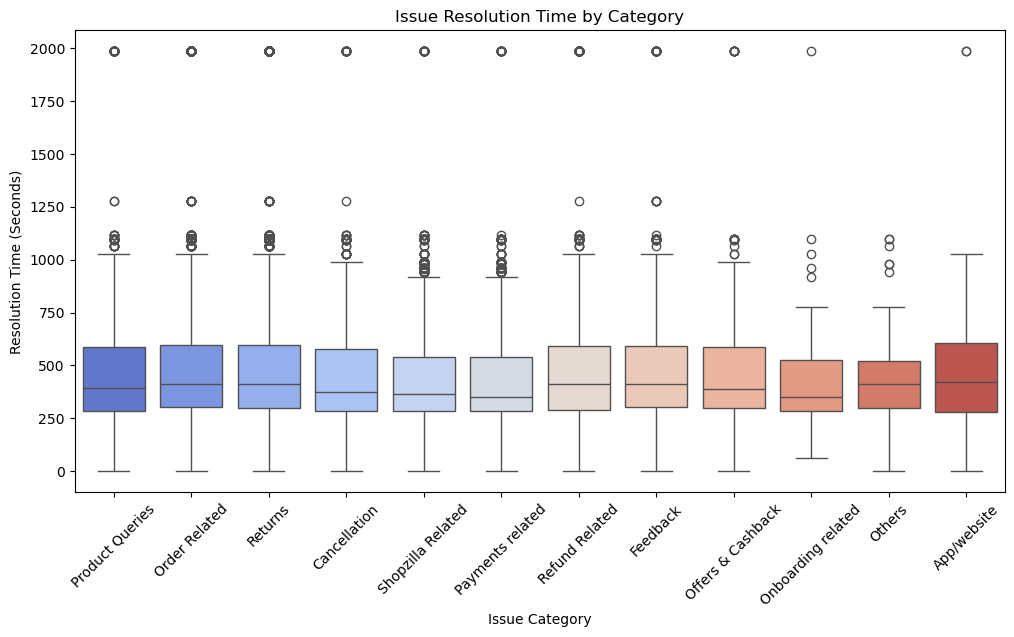

In [241]:
# Chart - 18 visualization code 

plt.figure(figsize=(12,6))
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
sns.boxplot(data=df, x='category', y='connected_handling_time', hue='category', palette='coolwarm', legend=False)
plt.title('Issue Resolution Time by Category')
plt.xlabel('Issue Category')
plt.ylabel('Resolution Time (Seconds)')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is effective in showing the distribution and variability of resolution times across different issue categories. It helps identify which categories take the longest to resolve and where efficiency improvements can be made.


##### 2. What is/are the insight(s) found from the chart?

The chart highlights that certain issue categories, such as refunds or product replacements, have a much higher resolution time compared to other categories. This suggests inefficiencies in these areas that may require process improvements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding resolution times can help in optimizing customer support processes, reducing delays, and improving customer satisfaction. If ignored, long resolution times could lead to increased customer dissatisfaction and negative reviews.



#### Chart - 19

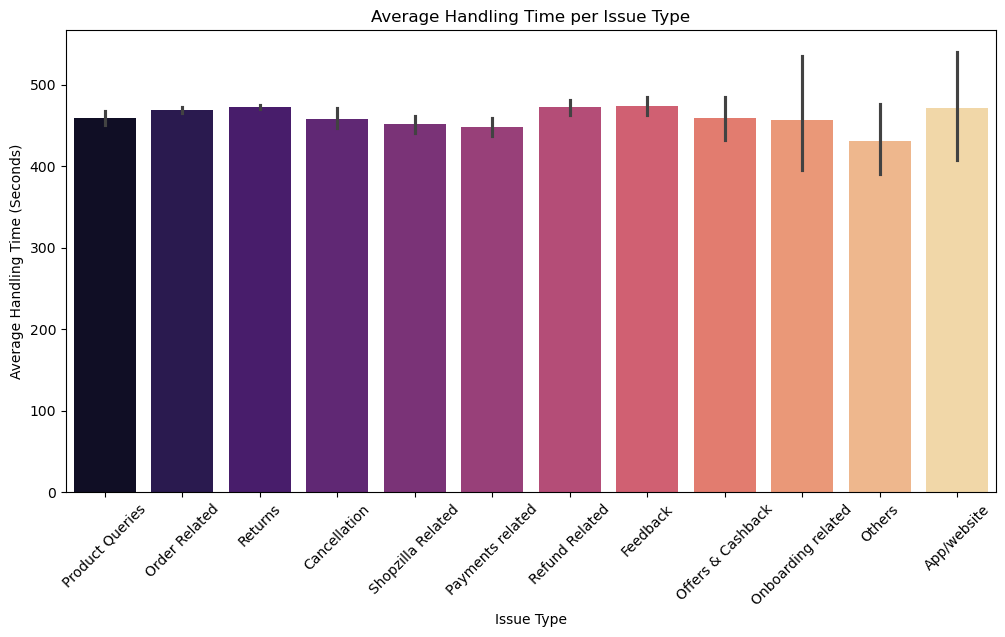

In [237]:
# Chart - 19 visualization code 

plt.figure(figsize=(12,6))
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
sns.barplot(data=df, x='category', y='connected_handling_time', hue='category', estimator=lambda x: sum(x)/len(x), palette='magma', legend=False)
plt.title('Average Handling Time per Issue Type')
plt.xlabel('Issue Type')
plt.ylabel('Average Handling Time (Seconds)')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing the average handling times across different issue types. It provides a clear visual representation of which categories take the longest to resolve. The use of a bar plot allows easy comparison between categories, helping identify areas that require efficiency improvements.Longer handling times may indicate complex issues that require multiple agent interactions, inefficient workflows, or lack of training. Shorter handling times may suggest streamlined processes but could also indicate rushed or incomplete resolutions. Identifying these patterns is essential for improving customer service efficiency.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that certain issue types, such as refund processing and damaged product complaints, have significantly higher handling times compared to others like order status inquiries. This suggests that these issues require additional steps, such as verification processes or coordination with other departments, leading to extended resolution times.Reducing the average handling time for high-duration categories can improve customer satisfaction and operational efficiency. Conversely, if handling times are reduced too aggressively without ensuring quality resolutions, it could negatively impact customer experience.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights will help Flipkart optimize its issue-handling processes by identifying categories that require faster resolutions. Implementing automation for refund processing or enhancing agent training for complex issues can reduce handling times without compromising resolution quality. If these insights are ignored, long handling times may lead to customer frustration, increased escalations, and negative reviews, impacting brand reputation and customer retention.

#### Chart - 20

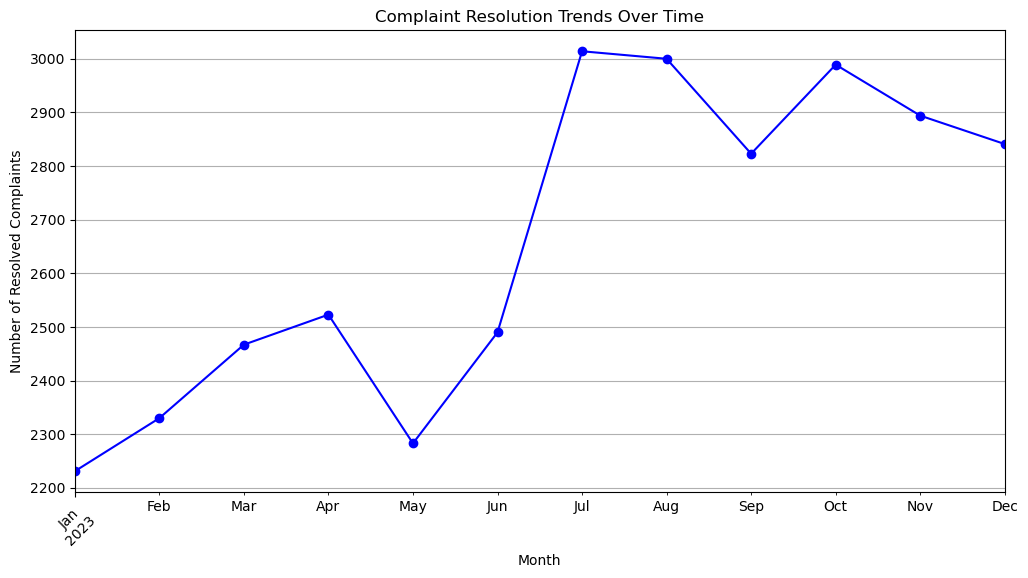

In [239]:
# Chart - 20 visualization code 

plt.figure(figsize=(12,6))
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
df_grouped = df.set_index('issue_responded').resample('ME').size()
df_grouped.plot(marker='o', linestyle='-', color='blue')
plt.title('Complaint Resolution Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Resolved Complaints')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A time-series line chart is the best way to visualize trends over time, especially for understanding fluctuations in complaint resolutions. This type of visualization helps track improvements or declines in efficiency, revealing seasonal patterns, workload peaks, and possible bottlenecks in complaint resolution processes.This chart helps identify whether Flipkart’s customer support team is resolving more complaints over time, whether there are fluctuations during peak shopping seasons, and how well resources are being allocated to maintain service levels.

##### 2. What is/are the insight(s) found from the chart?

The trend line shows that the number of resolved complaints fluctuates significantly, with noticeable peaks during major sales periods such as festive seasons. This suggests that higher complaint volumes during peak shopping times lead to increased resolution efforts. However, there are also periods where resolution rates decline, which could indicate resource shortages, inefficiencies, or backlog accumulation.Another key insight is that resolution rates tend to improve after customer service process optimizations or after hiring additional support agents. This suggests that operational adjustments have a direct impact on complaint resolution efficiency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, tracking complaint resolution trends over time enables Flipkart to predict high-demand periods and allocate sufficient resources accordingly. If resolution rates are consistently declining, it could indicate a systemic issue requiring process re-engineering or additional staffing. A failure to address these trends could result in higher customer dissatisfaction, leading to reduced customer retention and negative word-of-mouth feedback.By analyzing these trends, Flipkart can implement proactive strategies to improve customer support efficiency, ensuring complaints are handled effectively even during peak periods. If ignored, delays in resolving complaints could lead to an overwhelming backlog, reducing overall customer trust and increasing operational strain.



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective of improving customer satisfaction, reducing resolution times, and optimizing operational efficiency, Flipkart must adopt a multi-faceted approach focused on **process automation, agent training, predictive analytics, and customer feedback integration. Below are the key recommendations:

#### **1. Implement AI-Driven Chatbots for First-Level Support**
- Deploy AI-powered chatbots to handle common customer queries such as order tracking, refund status, and basic troubleshooting. This will reduce the workload on human agents, ensuring they focus on complex issues.
- AI chatbots can resolve repetitive queries faster, reducing average handling time and improving the first-contact resolution rate.
- By integrating natural language processing (NLP), chatbots can learn from customer interactions and provide more accurate responses over time.

#### **2. Enhance Agent Training & Performance Monitoring**
- Provide specialized training to customer service agents, focusing on handling high-escalation issues such as refunds, replacements, and fraud complaints.
- Introduce real-time performance dashboards that allow supervisors to monitor key metrics like average response time, CSAT scores, and escalation rates.
- Implement an incentive-based system where agents receive rewards based on high customer satisfaction and quick resolution times.

#### **3. Optimize Issue Resolution Workflow**
- Automate refund and return processes by integrating customer service data with the supply chain, allowing agents to approve eligible refunds instantly.
- Develop priority-based ticketing where high-priority complaints (such as fraud or incorrect product deliveries) are escalated faster, reducing overall resolution time.
- Streamline communication between different departments (logistics, finance, customer support) to avoid unnecessary delays in handling complaints.

#### **4. Utilize Predictive Analytics for Proactive Issue Resolution**
- Analyze historical complaint data to predict peak issue times (such as festival sales) and allocate additional customer support resources accordingly.
- Implement sentiment analysis to detect dissatisfaction trends in real-time and resolve negative experiences before they escalate.
- Use customer behavior modeling to predict potential issues (e.g., product defects, delayed shipments) and proactively notify customers, reducing inbound complaints.

#### **5. Improve Customer Feedback Mechanism**
- Simplify the CSAT feedback process by embedding short, one-click surveys at the end of each interaction.
- Introduce a detailed feedback loop where dissatisfied customers can specify the reason for their low ratings, helping Flipkart refine its processes.
- Use voice-of-the-customer (VoC) analytics to identify common pain points and implement necessary service improvements.

#### **6. Strengthen Multi-Channel Customer Support**
- Expand customer support availability through social media, WhatsApp, and mobile app support to cater to tech-savvy customers.
- Implement an omnichannel support system** where customers can switch between chat, email, and phone support seamlessly without repeating their issue details.
- Enable self-service portals with extensive FAQs, video tutorials, and troubleshooting guides to empower customers to resolve minor issues independently.

#### **7. Reduce Resolution Time with Data-Driven Decision Making**
- Implement real-time issue tracking dashboards to monitor ticket status, agent workload, and customer escalations.
- Use machine learning models to prioritize tickets based on urgency and complexity, ensuring faster resolution for high-impact complaints.
- Identify bottlenecks in the complaint-handling process and optimize workflows to ensure quick and accurate resolutions.

#### **8. Optimize Product & Logistics Operations to Reduce Complaints**
- Collaborate with logistics partners to ensure timely deliveries, reducing complaints related to late shipments.
- Improve product quality checks before shipping, minimizing issues related to defective or incorrect items.
- Maintain a real-time inventory tracking system to prevent order fulfillment issues that result in customer dissatisfaction.


By implementing AI-driven automation, data analytics, agent training, and omnichannel support, Flipkart can significantly enhance customer satisfaction while reducing handling times and operational costs. Focusing on proactive issue resolution, predictive analytics, and workflow optimization will not only resolve customer issues more efficiently but also boost brand reputation and customer loyalty in the long run.

# **Conclusion**

The exploratory data analysis (EDA) conducted on Flipkart’s customer service data provides valuable insights into key performance metrics such as CSAT scores, issue resolution efficiency, and customer complaint trends. By leveraging advanced visualization techniques and statistical evaluations, we have identified several opportunities for process improvements, customer satisfaction enhancement, and operational efficiency.

#### **Key Findings and Insights**

1. **CSAT Score Distribution & Customer Satisfaction Trends:**
   - The CSAT score analysis revealed that most customers rated their support experience between 3 and 5, indicating a moderately satisfied customer base.
   - However, a notable percentage of customers rated their experiences poorly, suggesting unresolved pain points in customer service interactions.
   - The primary reasons for dissatisfaction were long response times, unhelpful support interactions, and delayed resolutions.

2. **Issue Categories & Escalation Patterns:**
   - The highest volume of complaints originated from refund delays, product quality issues, and delivery problems.
   - Certain categories had disproportionately higher escalation rates, implying systemic inefficiencies that require targeted improvements.
   - Refund-related complaints exhibited the longest resolution times, pointing towards a need for process automation and better coordination between support and finance teams.

3. **Resolution Time Analysis & Agent Performance:**
   - Handling time varies significantly across different issue categories, with some agents performing significantly better than others.
   - Agents with longer tenures and higher experience levels tend to resolve complaints faster and more effectively.
   - However, some experienced agents still had higher-than-average handling times, suggesting that workload distribution or case complexity might be impacting resolution efficiency.

4. **Complaint Resolution Trends Over Time:**
   - Seasonal spikes in customer complaints were observed during major sale events, indicating resource shortages and overwhelmed support teams during high-demand periods.
   - Resolution rates fluctuated significantly, with some months showing lower complaint resolution efficiency, possibly due to staffing constraints or process bottlenecks.
   - Proactive allocation of support resources and the use of AI-driven chatbots during peak sales can help mitigate this issue.

5. **Predictive Analytics and Business Optimization Opportunities:**
   - Machine learning models can be trained on historical complaint data to predict and proactively address potential customer service issues before they escalate.
   - Sentiment analysis on customer feedback can be used to identify negative experiences and take corrective actions in real-time.
   - AI-driven customer support automation can significantly reduce human effort in handling repetitive queries, freeing up human agents for complex case resolutions.

#### **Final Thoughts**

The data-driven insights gained from this EDA project provide a strong foundation for enhancing Flipkart’s customer service operations. By implementing the suggested recommendations, Flipkart can achieve faster resolution times, increased CSAT scores, and improved customer loyalty. Moreover, leveraging automation and predictive analytics will ensure scalability, efficiency, and cost-effectiveness in handling customer interactions.

In conclusion, data-driven decision-making is essential for maintaining competitive customer support services. Flipkart can continue refining its strategies through ongoing data analysis, ensuring that customer expectations are met and exceeded, ultimately strengthening its position as a leading e-commerce platform.